# Chapter 4: Quantum Annealing Strategy

Introduction to quantum annealing using D-Wave systems and QUBO formulations.

---

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_Software.ipynb` for installation instructions


In [1]:
# Setup and imports for D-Wave
import numpy as np
import matplotlib.pyplot as plt
import neal
from pyqubo import Binary, Array,Placeholder
from dimod.reference.samplers import ExactSolver
import networkx as nx

from Chapter03_StructuralOptimization_functions import (truss1x1,truss1x2,truss2x2,TrussFEM)
from Chapter04_QuantumAnnealing_functions import QATrussOptimizer
print('Setup complete!')

Setup complete!


##  A 3-variable QUBO problem using an exact solver.

$$ \min_{\{a,b,c\}}  (0.6 a b +0.2 a c + 0.03 b c - 0.1 a - 0.5 b - 0.2c ) $$

In [2]:
a,b,c = Binary("a"), Binary("b"),Binary("c")
H  = 0.6*a*b +0.2*a*c + 0.03*b*c -0.1*a - 0.5*b -0.2*c
model = H.compile()
bqm = model.to_bqm()
# using exact solver for small problems
sampler = ExactSolver() 
results = sampler.sample(bqm)
print(results)

   a  b  c energy num_oc.
6  0  1  1  -0.67       1
7  0  1  0   -0.5       1
1  0  0  1   -0.2       1
2  1  0  1   -0.1       1
3  1  0  0   -0.1       1
0  0  0  0    0.0       1
4  1  1  0    0.0       1
5  1  1  1   0.03       1
['BINARY', 8 rows, 8 samples, 3 variables]


## Max-cut graph QUBO problem using Exact solver

In [3]:
G = nx.Graph() # convenient
G.add_edges_from([(1,2),(1,3),(2,4),(3,4),(3,5),(4,5)])
H = 0
q = Array.create("q",shape = 5,vartype = "BINARY")
for i, j in G.edges:# create H from graph
    H = H + 2*q[i-1]*q[j-1] - q[i-1] - q[j-1] # offset by 1

model = H.compile()
bqm = model.to_bqm()
# using exact solver for small problems
sampler = ExactSolver()  
results = sampler.sample(bqm)
print(results)

   q[0] q[1] q[2] q[3] q[4] energy num_oc.
8     1    0    0    1    0   -5.0       1
9     1    0    0    1    1   -5.0       1
28    0    1    1    0    0   -5.0       1
29    0    1    1    0    1   -5.0       1
6     1    0    0    0    1   -4.0       1
11    1    0    1    1    0   -4.0       1
12    0    0    1    1    0   -4.0       1
19    0    1    1    1    0   -4.0       1
25    1    1    0    0    1   -4.0       1
30    0    1    0    0    1   -4.0       1
2     0    0    1    0    1   -3.0       1
3     0    0    1    0    0   -3.0       1
4     1    0    1    0    0   -3.0       1
5     1    0    1    0    1   -3.0       1
14    0    0    0    1    1   -3.0       1
15    0    0    0    1    0   -3.0       1
16    0    1    0    1    0   -3.0       1
17    0    1    0    1    1   -3.0       1
22    1    1    0    1    1   -3.0       1
23    1    1    0    1    0   -3.0       1
26    1    1    1    0    1   -3.0       1
27    1    1    1    0    0   -3.0       1
1     0    

##  Solve using Simulated Annealing

In [4]:
sampler = neal.SimulatedAnnealingSampler()
results = sampler.sample(bqm)
print(results)

  q[0] q[1] q[2] q[3] q[4] energy num_oc.
0    0    1    1    0    0   -5.0       1
['BINARY', 1 rows, 1 samples, 5 variables]


##  Solve a constrained graph problem 
Via the Lagrangian multiplier, using an Exact QUBO solver.

In [5]:
G = nx.Graph() # convenient
G.add_edges_from([(1,2),(1,3),(2,4),(3,4),(3,5),(4,5)])
H = 0
q = Array.create("q",shape = 5,vartype = "BINARY")
for i, j in G.edges:# create H from graph
    H = H + 2*q[i-1]*q[j-1] - q[i-1] - q[j-1] # offset by 1
lam = 100
H = H + lam*(q[0] + q[3]-1)**2
model = H.compile()
bqm = model.to_bqm()
# using exact solver for small problems
sampler = ExactSolver()  
results = sampler.sample(bqm)
print(results)

   q[0] q[1] q[2] q[3] q[4] energy num_oc.
4     0    0    1    1    0   -4.0       1
14    1    0    0    0    1   -4.0       1
17    1    1    0    0    1   -4.0       1
27    0    1    1    1    0   -4.0       1
2     1    0    1    0    0   -3.0       1
7     0    0    0    1    0   -3.0       1
8     0    0    0    1    1   -3.0       1
13    1    0    1    0    1   -3.0       1
18    1    1    1    0    1   -3.0       1
23    0    1    0    1    1   -3.0       1
24    0    1    0    1    0   -3.0       1
29    1    1    1    0    0   -3.0       1
1     1    0    0    0    0   -2.0       1
11    0    0    1    1    1   -2.0       1
20    0    1    1    1    1   -2.0       1
30    1    1    0    0    0   -2.0       1
6     1    0    0    1    0   95.0       1
9     1    0    0    1    1   95.0       1
19    0    1    1    0    1   95.0       1
28    0    1    1    0    0   95.0       1
5     1    0    1    1    0   96.0       1
16    0    1    0    0    1   96.0       1
3     0    

## QUBO truss optimization

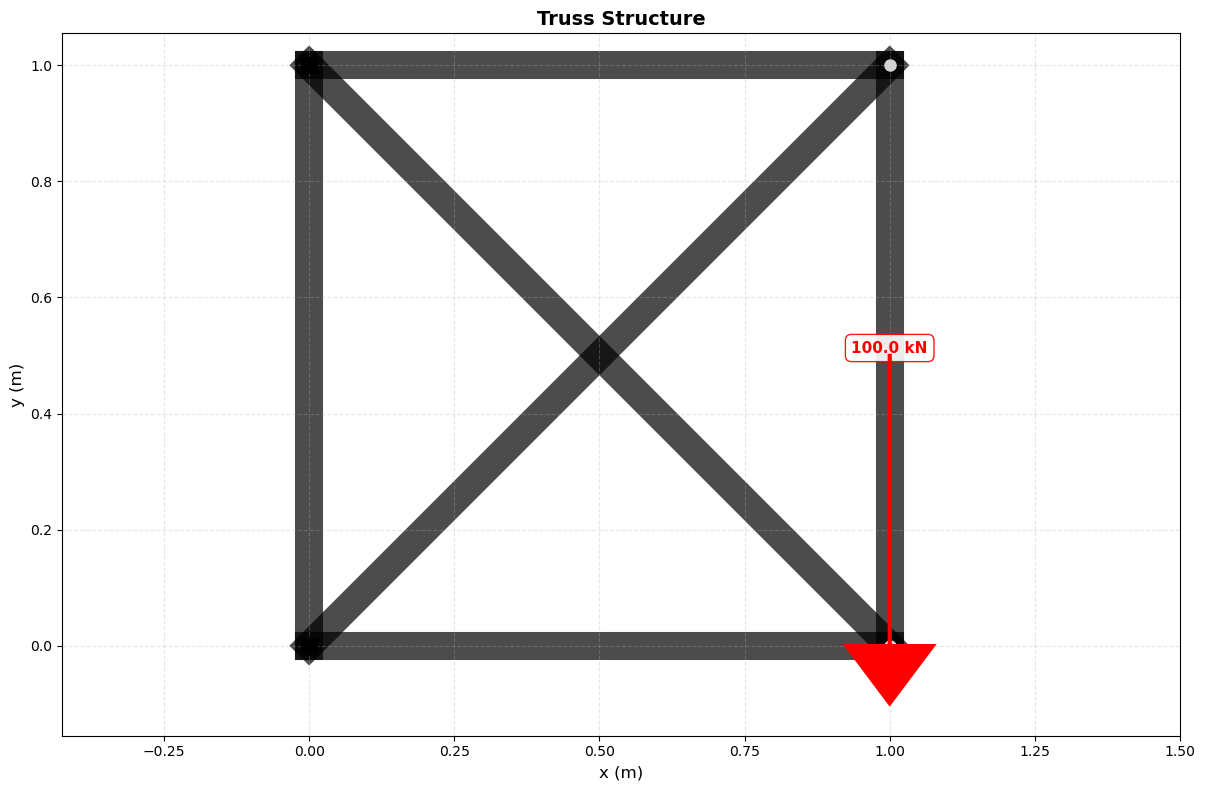

Initial design: Volume = 3.4142, Max Stress = 157757.7011


In [9]:
A0 = 0.5  # Initial cross-sectional area in m^2
fem_model = truss1x1(E=200e9, A=A0) # 
fem_model.plot_truss()
fem_model.solve()
metrics = fem_model.evaluate_design()
V0 = metrics['volume']

print(f"Initial design: Volume = {metrics['volume']:.4f}, Max Stress = {metrics['max_stress']:.4f}")




## QUBO Optimization

QUANTUM ANNEALING TOPOLOGY OPTIMIZATION
Problem: 6 elements
Target volume: 1.7071 m³
Initial areas: [0.5 0.5 0.5 0.5 0.5 0.5]

✓ CONVERGED after 30 iterations
  Objective change < 1.00% for 5 iterations

OPTIMIZATION COMPLETE
Total iterations: 30
Total time: 2.58s (0.086s per iteration)

Final Design:
  Compliance: 3.0771e-01 J
  Volume: 1.6925 m³ (target: 1.7071)
  Active members: 6/6
  Area range: [3.8699e-02, 6.4239e-01] m²
  Feasible: True


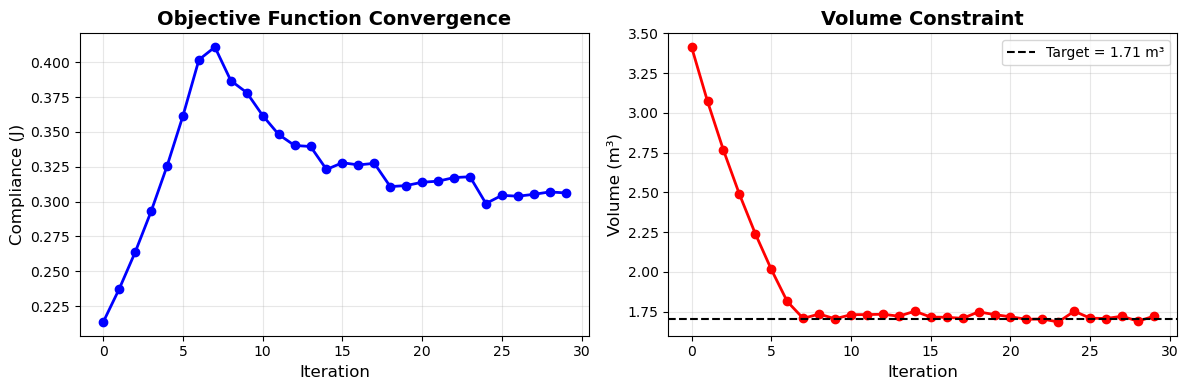

In [10]:
trussQA = QATrussOptimizer(
        fem_model=fem_model,
        V_bar= 0.5*V0, 
    )

# Run optimization
results = trussQA.optimize()

trussQA.plot_convergence()

## Optimized truss

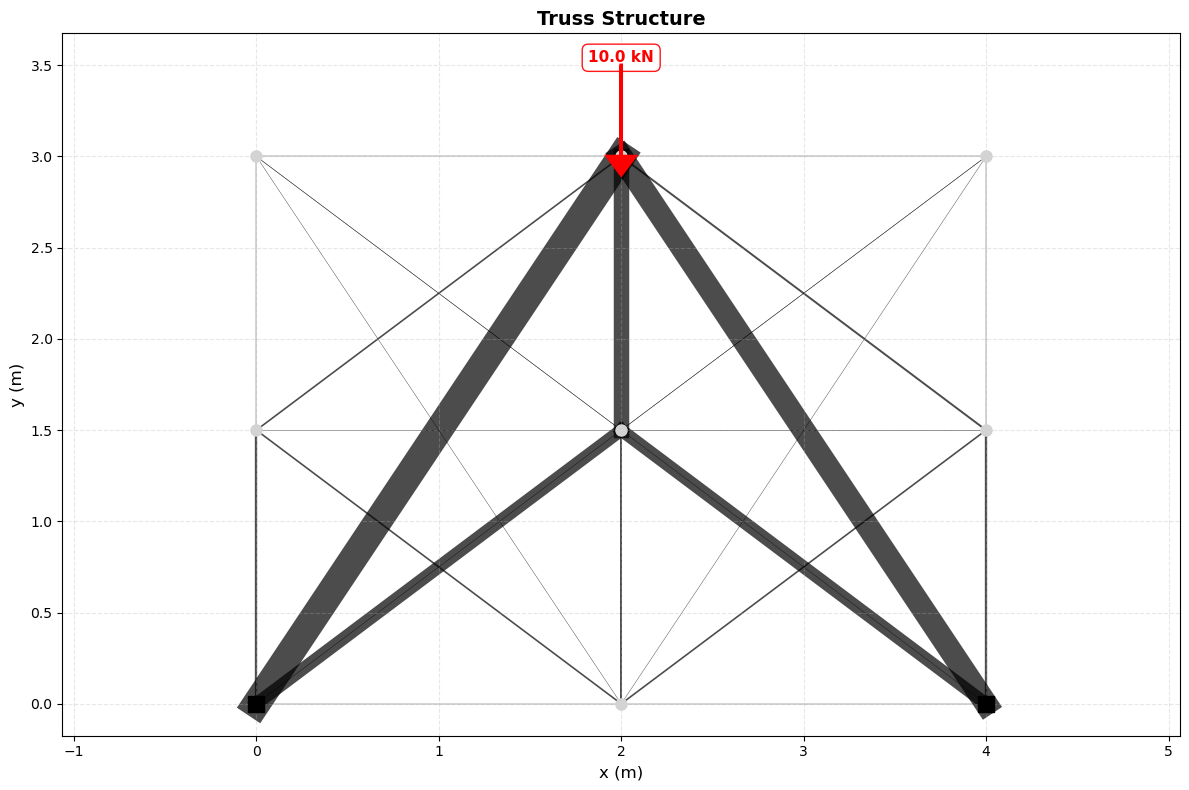

In [8]:
fem_model.plot_truss()